# Analysis of the precipitation at the octoberfest and its influence on the amount of visitors

## Import necessary libraries

In [616]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import timedelta
import numpy as np
import scipy.stats
from tueplots.constants.color import rgb
%matplotlib inline

## Functions

In [617]:
'''octoberfestday:
        input:  string in format yearmonthday
        output: true if octoberfest took place that day
'''
def octoberfestday(date):
    date = str(date)
    
    #convert date in datetimedate
    date = datetime.date(int(date[0:4]),int(date[4:6]),int(date[6:8]))

    #compute time of octoberfest in that year
    year = date.year
    posstartdate = datetime.date(year, 9, 16)
    weekdate = posstartdate.weekday()
    diff = 5 - weekdate
    if (diff <= -1):
        diff = 7 + diff
    startdate = datetime.date(year, 9, 16+diff)
    duration = octoberfestdata.loc[octoberfestdata['jahr'] == year]['dauer'].values[0]
    enddate = startdate + timedelta(days=int(duration)-1)
    
    #check if date is at time of octoberfest
    return (startdate <= date <= enddate)


'''getyear:
        input:  date in format yearmontday
        output: year as string
'''
def getyear(date):
    return str(date)[0:4]


'''corrcolor:
        input:  octoberfestduration
        output: corresponding color
'''
def corrcolor(duration):
    print(duration)
    if duration == 16:
        return rgb.tue_blue
    elif duration == 17:
        return rgb.tue_red
    elif duration == 18:
        return rgb.tue_yellow


'''precipitationtotal_daily:
      input:  daily precipitation in pandas dataframe
      output: total precipitation in time of octoberfest and duration of octoberfest as dictionary
'''
def precipitationtotal_daily(daily):
    totaldict = {}
    for index, row in daily.iterrows():
        year = getyear(row['MESS_DATUM'])
        year = int(year)
        if year in totaldict.keys():
            totaldict[year][0] = totaldict[year][0] + row[' RSK']
            
        else:
            totaldict[year] = [row[' RSK'], octoberfestdata.loc[octoberfestdata['jahr'] == year]['dauer'].iloc[0]]
    return totaldict


''' precipitationtotal_hourly:
        input:  hourly precipitation in pandas dataframe
        output: total precipitation in time of the octoberfest as dictionary
'''
def precipitationtotal_hourly(hourly):
    totaldict = {}
    for index, row in hourly.iterrows():
        year = getyear(row['MESS_DATUM'])
        year = int(year)
        if year in totaldict.keys():

           #only use positive values 
           if row['  R1'] >= 0:
               totaldict[year][0] = totaldict[year][0] + row['  R1']
        else:
            if row['  R1'] >= 0:
                totaldict[year] = [row['  R1'], octoberfestdata.loc[octoberfestdata['jahr'] == year]['dauer'].iloc[0]]
    return totaldict


''' precipitationday_hourly:
        input:  hourly precipitation in pandas dataframe
        output: total precipitation in time of the octoberfest from 10am to 10pm as dictionary
'''
def precipitationday_hourly(hourly):
    totaldict = {}
    for index, row in hourly.iterrows():
        year = getyear(row['MESS_DATUM'])
        year = int(year)

        #only use precipitation between 10am and 10pm
        day = int(str(row['MESS_DATUM'])[8:]) < 22 and int(str(row['MESS_DATUM'])[8:]) >= 10
        if year in totaldict.keys() and day:
            if row['  R1'] >= 0:
                totaldict[year][0] = totaldict[year][0] + row['  R1']
        elif day:
            if row['  R1'] >= 0:
                totaldict[year] = [row['  R1'],octoberfestdata.loc[octoberfestdata['jahr'] == year]['dauer'].iloc[0]]    
    return totaldict


''' weekendprecipitation:
        input:  hourly precipitation in pandas dataframe
        output: total precipitation in time of the octoberfest on the weekends as dictionary
'''
def weekendprecipitation(precipdata):
    weekenddict = {}
    for index, row in precipdata.iterrows():
        precipday = str(row['MESS_DATUM'])
        date = datetime.date(int(precipday[0:4]),int(precipday[4:6]),int(precipday[6:8]))
        year = getyear(row['MESS_DATUM'])
        year = int(year)
        weekday = date.weekday()
        day = int(str(row['MESS_DATUM'])[8:]) < 22 and int(str(row['MESS_DATUM'])[8:]) >= 10

        #only use precipitation on weekends
        if ((weekday == 5) or (weekday == 6)):
            #only use precipitation between 10am and 10pm
            if year in weekenddict.keys() and day:
                if row['  R1'] >= 0:
                    weekenddict[year][0] = weekenddict[year][0] + row['  R1']
            elif day:
                weekenddict[year] = [row['  R1'], octoberfestdata.loc[octoberfestdata['jahr'] == year]['dauer'].iloc[0]]
    return weekenddict

## Load data

Load daily precipitation data  
(Download from: https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/daily/kl/historical/tageswerte_KL_03379_19540601_20221231_hist.zip)

Load hourly precipitation data   
(Downloaded from: https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/kl/historical/stundenwerte_KL_03379_19540601_20221231_hist.zip)  
   
Load octoberfest data   
(Downloaded from: https://opendata.muenchen.de/dataset/oktoberfest/resource/e0f664cf-6dd9-4743-bd2b-81a8b18bd1d2?view_id=e619eb4d-fc3b-44cc-88ea-0086d710ee1f)   

In [618]:
'''
Read necessary precipitation data from the original files when using it for the first time.
'''
#hourlydata = pd.read_csv("hourly_data/munic/produkt_rr_stunde_19970707_20221231_03379.txt",sep=";")
#hourlydata_recent = pd.read_csv("hourly_data/recent/produkt_rr_stunde_20220714_20240114_03379.txt",sep=";")
#hourlydata = pd.concat([hourlydata, hourlydata_recent],ignore_index=True)
#dailydata = pd.read_csv("daily_data/munic/produkt_klima_tag_19540601_20221231_03379.txt", sep=";")
#dailydata_recent = pd.read_csv("daily_data/recent/produkt_klima_tag_20220714_20240114_03379.txt",sep=";")
#dailydata = pd.concat([dailydata,dailydata_recent],ignore_index=True)

'''
Add octoberfestdata for 2023.
'''
octoberfestdata = pd.read_csv("oktoberfestgesamt19852022.csv")
data2023 = pd.DataFrame({'jahr':[2023],'dauer':[18],'besucher_gesamt':[7.2],'besucher_tag':[400.0]})
octoberfestdata = pd.concat([octoberfestdata,data2023],ignore_index=True)

Drop all data from the precipitation data from before 1985 and after 2019, but keep data from 2022 and 2023. Those are the years for which we have octoberfestvisitor data. Also drop all the precipitationdata from dates were the octoberfest didn't take place. Write the selected precipitation data to a csv file, so the whole dataset only needs to be reloaded when the data changes.

In [619]:
'''
Write necessary data to files an drop the rest to reduce the running time when using the same data again.
'''
#dailydata = dailydata[((20191231 >= dailydata['MESS_DATUM']) & (dailydata['MESS_DATUM'] >= 19850101)) | ((20231231 >= dailydata['MESS_DATUM']) & (20220101 <= dailydata['MESS_DATUM']))]
#dailydata = dailydata[dailydata['MESS_DATUM'].map(octoberfestday)]
#hourlydata = hourlydata[((2019123123 >= hourlydata['MESS_DATUM']) & (hourlydata['MESS_DATUM'] >= 1985010100)) | ((2023123123 >= hourlydata['MESS_DATUM']) & (2022010100 <= hourlydata['MESS_DATUM']))]
#hourlydata = hourlydata[hourlydata['MESS_DATUM'].map(octoberfestday)]
#dailydata.to_csv('octoberfest_daily.csv', index = True)
#hourlydata.to_csv('octoberfest_hourly.csv', index = True)

'''
Read filtered data from the files it gt written to before. 
'''
dailydata = pd.read_csv('octoberfest_daily.csv', sep=",")
hourlydata = pd.read_csv('octoberfest_hourly.csv',sep=",")

## Visualization of precipitation and visitor data
Visualization of the total precipitaion, the precipitation on each day from 10am to 10pm and the visitornumbers in the time of the octoberfest in the years from 1985 to 2023. Due to Covid the Octoberfest didn't take place in 2020 and 2021 so there is no data for these years.

To label the heights of the bars with their height to better see the difference between the total precipitation and the pricipitation from 10am to 10pm use the two for loops in the code.

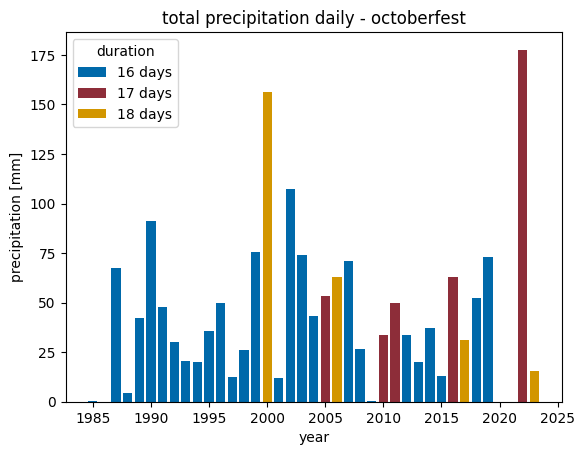

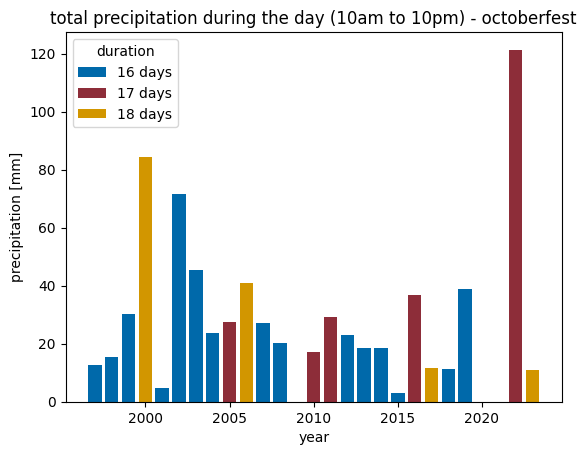

<Axes: xlabel='jahr'>

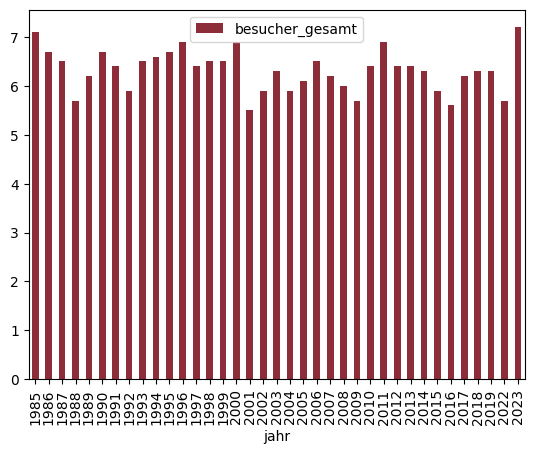

In [620]:
#compute total precipitation in the time of the octoberfest and plot it
totalprecipitation_daily = precipitationtotal_daily(dailydata)
keys_daily = list(totalprecipitation_daily.keys())
values_daily = [item[0] for item in totalprecipitation_daily.values()]
plt.ylabel("precipitation [mm]")
plt.xlabel("year")
#for i, label in enumerate(keys_daily):
#    plt.text(keys_daily[i]-0.6,values_daily[i]+0.4,round(values_daily[i],2),fontsize='xx-small') 
plt.bar([key for key,val in totalprecipitation_daily.items() if val[1]==16],[val[0] for key,val in totalprecipitation_daily.items() if val[1]==16],color=rgb.tue_blue,label="16 days")
plt.bar([key for key,val in totalprecipitation_daily.items() if val[1]==17],[val[0] for key,val in totalprecipitation_daily.items() if val[1]==17],color=rgb.tue_red,label="17 days")
plt.bar([key for key,val in totalprecipitation_daily.items() if val[1]==18],[val[0] for key,val in totalprecipitation_daily.items() if val[1]==18],color=rgb.tue_orange,label="18 days")
plt.title("total precipitation daily - octoberfest")

legend = plt.legend(loc='upper left',title="duration")
plt.show()

totalprecipitationday_hourly = precipitationday_hourly(hourlydata)
keys_hourly = list(totalprecipitationday_hourly.keys())
values_hourly = [item[0] for item in totalprecipitationday_hourly.values()]
plt.ylabel("precipitation [mm]")
plt.xlabel("year")
#for i, label in enumerate(keys_hourly):
#    plt.text(keys_hourly[i]-0.6,values_hourly[i]+0.4,round(values_hourly[i],2),fontsize='xx-small') 
plt.bar([key for key,val in totalprecipitationday_hourly.items() if val[1]==16],[val[0] for key,val in totalprecipitationday_hourly.items() if val[1]==16],color=rgb.tue_blue,label="16 days")
plt.bar([key for key,val in totalprecipitationday_hourly.items() if val[1]==17],[val[0] for key,val in totalprecipitationday_hourly.items() if val[1]==17],color=rgb.tue_red,label="17 days")
plt.bar([key for key,val in totalprecipitationday_hourly.items() if val[1]==18],[val[0] for key,val in totalprecipitationday_hourly.items() if val[1]==18],color=rgb.tue_orange,label="18 days")    

legend = plt.legend(loc='upper left',title="duration")
plt.title("total precipitation during the day (10am to 10pm) - octoberfest")
plt.show()


octoberfestdata.plot(x="jahr",y="besucher_gesamt",kind="bar",color=rgb.tue_red)

Since the hourly precipitation for munic is only available from 1997 the plot with the precipitation at daytime has less years. Both precipitation plots show varying amount of precipitation in each year. Also the plot of the amount of visitors varies between the different years. In the following analysis the goal is to see if the precipitation has an influence on the amount of visitors. The assumption is, that less vistors come to the octoberfest if there is a bigger amount of precipitation.

## Is there a correaltion between the amount of visitors and the amount of precipitation at the octoberfest?

Plot the total precipitation on the x-axis and the amount of visitors on the y-axis to see if there is a correlation. We are using the mean of the precipitation per day and the mean of visitors per day here since the duration of the octoberfest differs in the different years. The total amount is most likely more influenced by the duration than the daily mean.

To label the data points in the plot withe the corresponding year use the for loop in the code.

The precipitation data from 1985 to 2023 is used here.

Pearson correlation coefficient for the daily mean visitors an the daily mean precipitation:
-0.19129926891015325


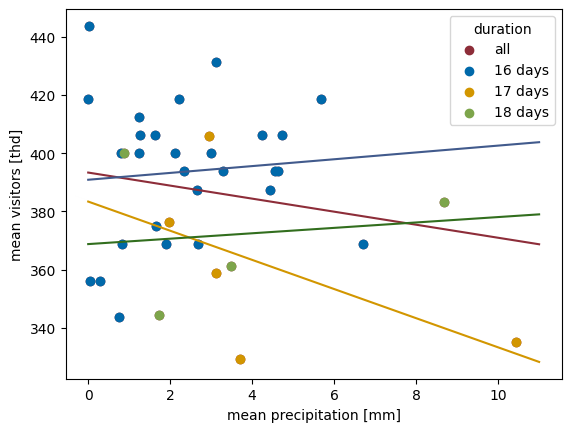

In [621]:
ax=plt.subplot()

#if you want to look at the precipitaion since 1997 for the duration of the octoberfestdata use the following two line. Otherwise all the data available will be use.
#totalprecipitation_daily = precipitationtotal_hourly(hourlydata)
#octoberfestdata = octoberfestdata[(octoberfestdata['jahr'] >= 1997)]

# plots the mean precipitaion in comparison to the daily mean visitors
plt.scatter([(val[0]/val[1]) for key,val in totalprecipitation_daily.items()],1000*octoberfestdata['besucher_gesamt']/octoberfestdata['dauer'],color=rgb.tue_red,label="all")
m,b = np.polyfit([(val[0]/val[1]) for val in totalprecipitation_daily.values()], 1000*octoberfestdata['besucher_gesamt']/octoberfestdata['dauer'], deg=1)
func = str(m)+"x"+str(b)
plt.plot(np.arange(start=0,stop=12,step=1), m*np.arange(start=0,stop=12,step=1)+b,color=rgb.tue_red)

#compute the pearson correlation coefficient
xl = [(val[0]/val[1]) for key,val in totalprecipitation_daily.items()]
yl = [octoberfestdata['besucher_gesamt']/octoberfestdata['dauer']][0].to_list()
xlnp = np.array(xl)
ylnp = np.array(yl)
print("Pearson correlation coefficient for the daily mean visitors an the daily mean precipitation:") 
print(scipy.stats.pearsonr(xlnp,ylnp)[0])
years = list(range(1985,2020))

years.append(2022)
years.append(2023)
#labels dots with corresponding year
#for i, label in enumerate(years):
#    print(i)
#    print(label)
#    print(xl[i])
#    if label == 2023:
#        plt.text(xl[i],yl[i],label,fontsize='xx-small')
    

plt.scatter([(val[0]/16) for key,val in totalprecipitation_daily.items() if val[1] == 16], [1000*octoberfestdata.loc[octoberfestdata['jahr'] == key]['besucher_gesamt'].iloc[0]/16 for key,val in totalprecipitation_daily.items() if val[1] == 16], label="16 days",color=rgb.tue_blue)
m,b = np.polyfit([(val[0]/16) for val in totalprecipitation_daily.values() if val[1] == 16], [1000*octoberfestdata.loc[octoberfestdata['jahr'] == key]['besucher_gesamt'].iloc[0]/16 for key,val in totalprecipitation_daily.items() if val[1] == 16], deg=1)
func = str(m)+"x"+str(b)
plt.plot(np.arange(start=0,stop=12,step=1), m*np.arange(start=0,stop=12,step=1)+b,color=rgb.tue_darkblue)

plt.scatter([(val[0]/17) for key,val in totalprecipitation_daily.items() if val[1] == 17], [1000*octoberfestdata.loc[octoberfestdata['jahr'] == key]['besucher_gesamt'].iloc[0]/17 for key,val in totalprecipitation_daily.items() if val[1] == 17], label="17 days",color=rgb.tue_orange)
m,b = np.polyfit([(val[0]/17) for val in totalprecipitation_daily.values() if val[1] == 17], [1000*octoberfestdata.loc[octoberfestdata['jahr'] == key]['besucher_gesamt'].iloc[0]/17 for key,val in totalprecipitation_daily.items() if val[1] == 17], deg=1)
func = str(m)+"x"+str(b)
plt.plot(np.arange(start=0,stop=12,step=1), m*np.arange(start=0,stop=12,step=1)+b,color=rgb.tue_orange)

plt.scatter([(val[0]/18) for key,val in totalprecipitation_daily.items() if val[1] == 18], [1000*octoberfestdata.loc[octoberfestdata['jahr'] == key]['besucher_gesamt'].iloc[0]/18 for key,val in totalprecipitation_daily.items() if val[1] == 18], label="18 days",color=rgb.tue_green)
m,b = np.polyfit([(val[0]/18) for val in totalprecipitation_daily.values() if val[1] == 18], [1000*octoberfestdata.loc[octoberfestdata['jahr'] == key]['besucher_gesamt'].iloc[0]/18 for key,val in totalprecipitation_daily.items() if val[1] == 18], deg=1)
func = str(m)+"x"+str(b)
plt.plot(np.arange(start=0,stop=12,step=1), m*np.arange(start=0,stop=12,step=1)+b,color=rgb.tue_darkgreen)

ax.set_xlabel('mean precipitation [mm]')
ax.set_ylabel('mean visitors [thd]')
legend = ax.legend(loc='upper right',title="duration")
plt.show()

The computed Pearson correlation coefficient for the mean of the daily precipitation and the mean of daily visitors is -0.1913. This only corresponds to  weak orrelation. The minus indicates that it is a negative correalation whcih means that the amount of visitors gets less when the amount of precipitaion increases. Contrary to our expectation the plots show only a weak negative correalation. To rule out out that the reason for this is that the daily precipitation countains precipitation outside of the opening hours of the octoberfest we now look at the mean precipitation agains the mean vistitors but only use the hourly precipitation data from 10am to 10pm. The precipitation at night shouldn't have an impyt on the number of visitors. 

Here the available data begins in 1997 so we lose 12 years for the analysis

Pearson correlation coefficient for the daily mean visitors an the daily mean precipitatio from 10am to 10pm:
-0.2276428221353976


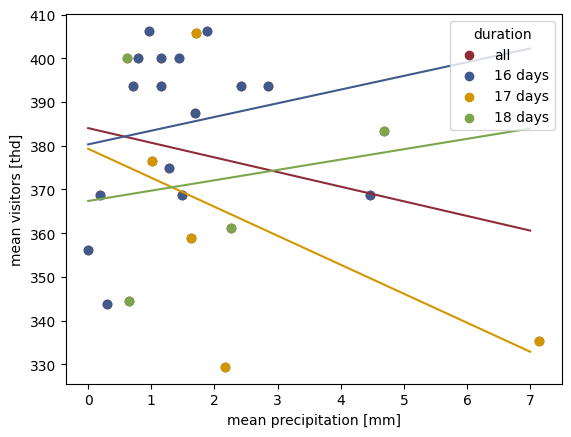

In [622]:
totalprecipitation_daily = precipitationday_hourly(hourlydata)
octoberfestdata = octoberfestdata[(octoberfestdata['jahr'] >= 1997)]

#compute the pearson correlation coefficient
xl = [val[0]/val[1] for key,val in totalprecipitation_daily.items()]
yl = [octoberfestdata['besucher_gesamt']/octoberfestdata['dauer']][0].to_list()
xlnp = np.array(xl)
ylnp = np.array(yl)
print("Pearson correlation coefficient for the daily mean visitors an the daily mean precipitatio from 10am to 10pm:")
print(scipy.stats.pearsonr(xlnp, ylnp)[0])

ax=plt.subplot()
#print([key for key,val in totalprecipitation.items() if val[1] == 16]
plt.scatter([val[0]/val[1] for key,val in totalprecipitation_daily.items()],1000*octoberfestdata['besucher_gesamt']/octoberfestdata['dauer'],color=rgb.tue_red,label="all")
m,b = np.polyfit([val[0]/val[1] for val in totalprecipitation_daily.values()], 1000*octoberfestdata['besucher_gesamt']/octoberfestdata['dauer'], deg=1)
func = str(m)+"x"+str(b)
plt.plot(np.arange(start=0,stop=8,step=1), m*np.arange(start=0,stop=8,step=1)+b,color=rgb.tue_red)

plt.scatter([val[0]/16 for key,val in totalprecipitation_daily.items() if val[1] == 16], [octoberfestdata.loc[octoberfestdata['jahr'] == key]['besucher_gesamt'].iloc[0]*1000/16 for key,val in totalprecipitation_daily.items() if val[1] == 16], label="16 days",color=rgb.tue_darkblue)
m,b = np.polyfit([val[0]/16 for val in totalprecipitation_daily.values() if val[1] == 16], [octoberfestdata.loc[octoberfestdata['jahr'] == key]['besucher_gesamt'].iloc[0]*1000/16 for key,val in totalprecipitation_daily.items() if val[1] == 16], deg=1)
func = str(m)+"x"+str(b)
plt.plot(np.arange(start=0,stop=8,step=1), m*np.arange(start=0,stop=8,step=1)+b,color=rgb.tue_darkblue)

plt.scatter([val[0]/17 for key,val in totalprecipitation_daily.items() if val[1] == 17], [octoberfestdata.loc[octoberfestdata['jahr'] == key]['besucher_gesamt'].iloc[0]*1000/17 for key,val in totalprecipitation_daily.items() if val[1] == 17], label="17 days",color=rgb.tue_orange)
m,b = np.polyfit([val[0]/17 for val in totalprecipitation_daily.values() if val[1] == 17], [octoberfestdata.loc[octoberfestdata['jahr'] == key]['besucher_gesamt'].iloc[0]*1000/17 for key,val in totalprecipitation_daily.items() if val[1] == 17], deg=1)
func = str(m)+"x"+str(b)
plt.plot(np.arange(start=0,stop=8,step=1), m*np.arange(start=0,stop=8,step=1)+b,color=rgb.tue_orange)

plt.scatter([val[0]/18 for key,val in totalprecipitation_daily.items() if val[1] == 18], [octoberfestdata.loc[octoberfestdata['jahr'] == key]['besucher_gesamt'].iloc[0]*1000/18 for key,val in totalprecipitation_daily.items() if val[1] == 18], label="18 days",color=rgb.tue_green)
m,b = np.polyfit([val[0]/18 for val in totalprecipitation_daily.values() if val[1] == 18], [octoberfestdata.loc[octoberfestdata['jahr'] == key]['besucher_gesamt'].iloc[0]*1000/18 for key,val in totalprecipitation_daily.items() if val[1] == 18], deg=1)
func = str(m)+"x"+str(b)
plt.plot(np.arange(start=0,stop=8,step=1), m*np.arange(start=0,stop=8,step=1)+b,color=rgb.tue_green)

ax.set_xlabel('mean precipitation [mm]')
ax.set_ylabel('mean visitors [thd]')
legend = ax.legend(loc='upper right', title="duration")
plt.show()

Even after not including the precipitation at night and in the morning there is still only a weak correlation. One explanation for that could be, that the octoberfest is at least 16 days long. That gives vistors a lot of dates they can visit the octoberfest instead of the day they planned, if that day is very rainy. Then the precipitation only influences vistors that can't make it at another date. This could explain why the red line in the plot above shows very few vistitors less when ther is more precipitation in comparison to less precipitation.

The fact that the absolute value of the correlation increases from 0.1913 to 0.2276 by 0.04 in comparison to the daily precipitation shows that the precipitation at day has a bigger influence.


Now we have look if there is a stronger correlation between the amount of visitors at the octoberfest if we only consider the precipitation on saturday and sunday. Since those are days of the weekend one can assume that on these days more vistors come on these days in comparison to the others. So the precipitation than has a greater influence on the total number of visitors.

Pearson correlation coefficient for the daily mean visitors an the daily mean precipitation on the weekends:
-0.214005798323597


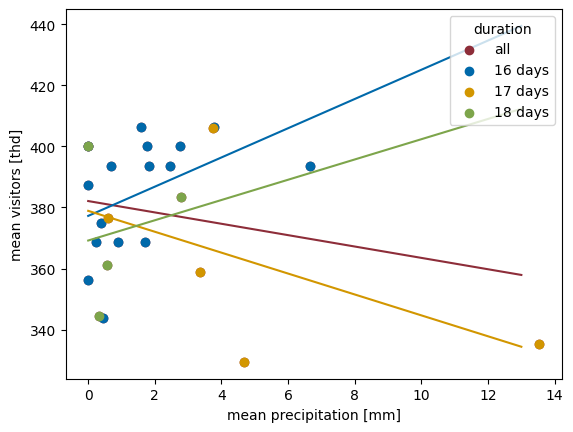

In [623]:
totalprecipitation_weekend = weekendprecipitation(hourlydata)

xl = [val[0]/val[1] for key,val in totalprecipitation_weekend.items()]
yl = [octoberfestdata['besucher_gesamt']/octoberfestdata['dauer']][0].to_list()
xlnp = np.array(xl)
ylnp = np.array(yl)
print("Pearson correlation coefficient for the daily mean visitors an the daily mean precipitation on the weekends:")
print(scipy.stats.pearsonr(xlnp, ylnp)[0])
ax=plt.subplot()
plt.scatter([val[0]/6 for key,val in totalprecipitation_weekend.items()],1000*octoberfestdata['besucher_gesamt']/octoberfestdata['dauer'],color=rgb.tue_red,label="all")
m,b = np.polyfit([val[0]/6 for val in totalprecipitation_weekend.values()], 1000*octoberfestdata['besucher_gesamt']/octoberfestdata['dauer'], deg=1)
func = str(m)+"x"+str(b)
plt.plot(np.arange(start=0,stop=14,step=1), m*np.arange(start=0,stop=14,step=1)+b,color=rgb.tue_red)

#print([key for key,val in totalprecipitation.items() if val[1] == 16]
plt.scatter([val[0]/6 for key,val in totalprecipitation_weekend.items() if val[1] == 16], [octoberfestdata.loc[octoberfestdata['jahr'] == key]['besucher_gesamt'].iloc[0]*1000/16 for key,val in totalprecipitation_weekend.items() if val[1] == 16], label="16 days",color=rgb.tue_blue)
m,b = np.polyfit([val[0]/6 for val in totalprecipitation_weekend.values() if val[1] == 16], [octoberfestdata.loc[octoberfestdata['jahr'] == key]['besucher_gesamt'].iloc[0]*1000/16 for key,val in totalprecipitation_weekend.items() if val[1] == 16], deg=1)
func = str(m)+"x"+str(b)
plt.plot(np.arange(start=0,stop=14,step=1), m*np.arange(start=0,stop=14,step=1)+b,color=rgb.tue_blue)


plt.scatter([val[0]/6 for key,val in totalprecipitation_weekend.items() if val[1] == 17], [octoberfestdata.loc[octoberfestdata['jahr'] == key]['besucher_gesamt'].iloc[0]*1000/17 for key,val in totalprecipitation_weekend.items() if val[1] == 17], label="17 days",color=rgb.tue_orange)
m,b = np.polyfit([val[0]/6 for val in totalprecipitation_weekend.values() if val[1] == 17], [octoberfestdata.loc[octoberfestdata['jahr'] == key]['besucher_gesamt'].iloc[0]*1000/17 for key,val in totalprecipitation_weekend.items() if val[1] == 17], deg=1)
func = str(m)+"x"+str(b)
plt.plot(np.arange(start=0,stop=14,step=1), m*np.arange(start=0,stop=14,step=1)+b,color=rgb.tue_orange)

plt.scatter([val[0]/6 for key,val in totalprecipitation_weekend.items() if val[1] == 18], [octoberfestdata.loc[octoberfestdata['jahr'] == key]['besucher_gesamt'].iloc[0]*1000/18 for key,val in totalprecipitation_weekend.items() if val[1] == 18], label="18 days",color=rgb.tue_green)
m,b = np.polyfit([val[0]/6 for val in totalprecipitation_weekend.values() if val[1] == 18], [octoberfestdata.loc[octoberfestdata['jahr'] == key]['besucher_gesamt'].iloc[0]*1000/18 for key,val in totalprecipitation_weekend.items() if val[1] == 18], deg=1)
func = str(m)+"x"+str(b)
plt.plot(np.arange(start=0,stop=14,step=1), m*np.arange(start=0,stop=14,step=1)+b,color=rgb.tue_green)
ax.set_xlabel('mean precipitation [mm]')
ax.set_ylabel('mean visitors [thd]')
legend = ax.legend(loc='upper right', title="duration")
plt.show()

Using only the weekend brings no stronger correlation between the number of visitors and the amound of precipitation.

## Problems in the analysis of the correlation between the amount of visitors and the amount of precipitation.
